In [25]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
import matplotlib

# Data visu 

In [26]:
#data importation 
data = pd.read_csv("datas/simulated_4K_cloud_gaming_dataset.csv")

print("dataframe information gathering ")

print (data.head())
print (data.index)
print (data.columns)
print (data.dtypes)
print (data.info())
print (data.describe())




dataframe information gathering 
   CPU_usage  GPU_usage  Bandwidth_MBps  Latency_ms  FrameRate_fps  Jitter_ms  \
0         71         65       19.770323   66.202388      59.107060  13.085300   
1         34         40        8.092595   32.207380      57.969683   8.567330   
2         91         55       16.841666  133.478904      52.248079   1.129479   
3         80         73       15.702267  125.328933      38.382477  10.944737   
4         40         76       11.227322  111.041017      33.949608  18.508754   

   QoE_score  
0          3  
1          3  
2          1  
3          1  
4          2  
RangeIndex(start=0, stop=1000, step=1)
Index(['CPU_usage', 'GPU_usage', 'Bandwidth_MBps', 'Latency_ms',
       'FrameRate_fps', 'Jitter_ms', 'QoE_score'],
      dtype='object')
CPU_usage           int64
GPU_usage           int64
Bandwidth_MBps    float64
Latency_ms        float64
FrameRate_fps     float64
Jitter_ms         float64
QoE_score           int64
dtype: object
<class 'pandas.co

# Data Cleaning 

In [27]:
print (data.shape)

(1000, 7)


In [28]:
data = data.dropna()
data = data.drop_duplicates()

In [29]:
print (data.shape)

(1000, 7)


# Visualisation

In [30]:
print(data['QoE_score'].value_counts())

QoE_score
3    379
2    312
1    222
4     84
5      3
Name: count, dtype: int64


## Déséquilibre des classes (ou des notes de QoE à gérer)

<Figure size 1000x600 with 0 Axes>

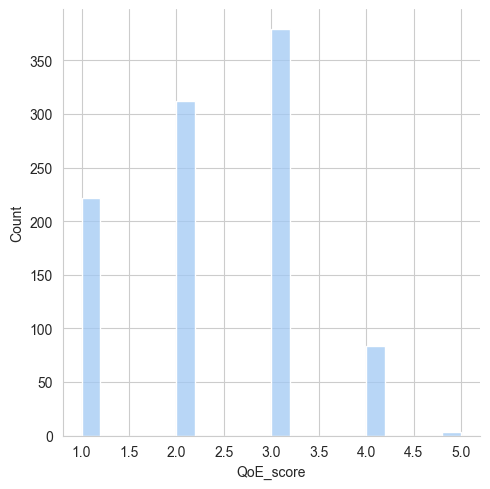

In [31]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.displot(data['QoE_score'])
plt.show()

### View of key features 

<Axes: xlabel='QoE_score', ylabel='Latency_ms'>

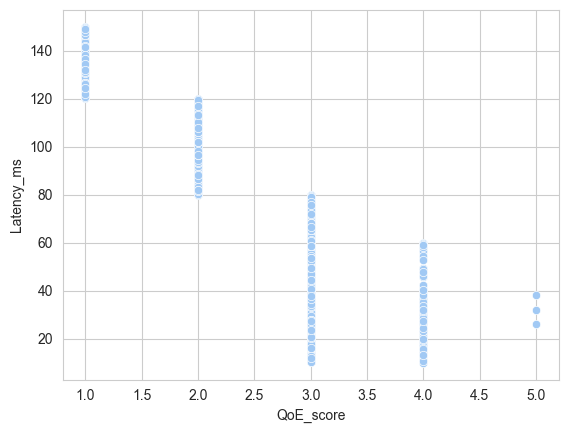

In [32]:
sns.scatterplot(data = data, x = 'QoE_score', y = 'Latency_ms')

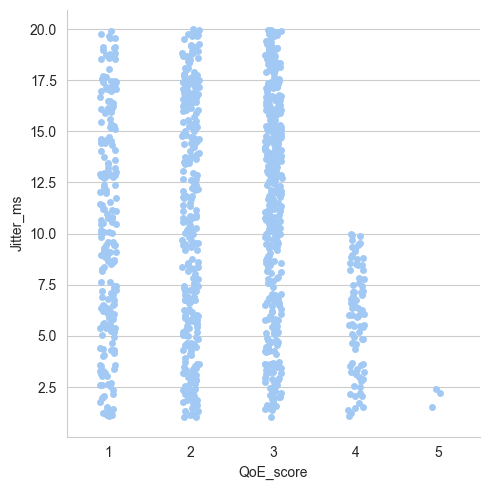

In [33]:
sns.catplot(data= data, x='QoE_score', y = 'Jitter_ms')

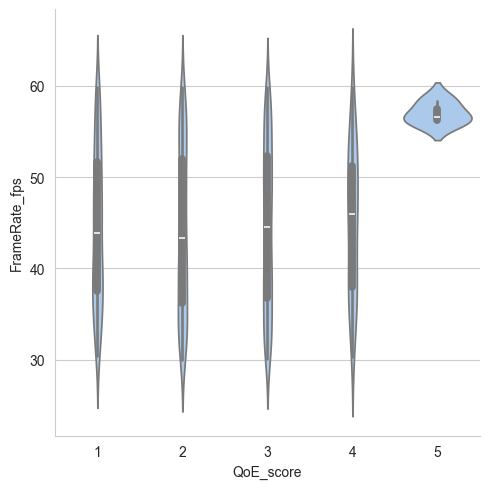

In [34]:
sns.catplot(data= data,kind='violin', x='QoE_score', y = 'FrameRate_fps')

<Axes: xlabel='QoE_score', ylabel='Bandwidth_MBps'>

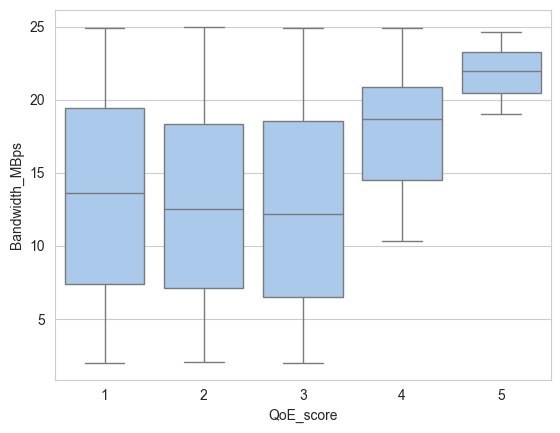

In [35]:
sns.boxplot(data=data, x='QoE_score', y= 'Bandwidth_MBps')

<Axes: xlabel='QoE_score', ylabel='CPU_usage'>

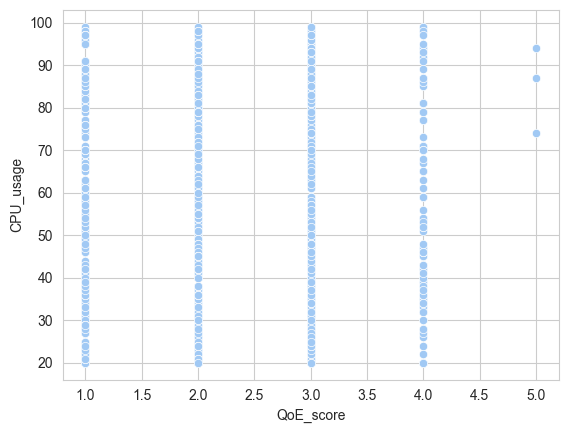

In [36]:
sns.scatterplot(data = data, x = 'QoE_score', y = 'CPU_usage')


<Axes: xlabel='QoE_score', ylabel='GPU_usage'>

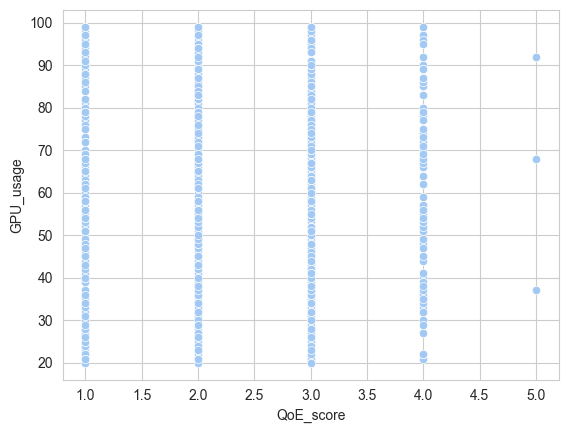

In [37]:
sns.scatterplot(data = data, x = 'QoE_score', y = 'GPU_usage')


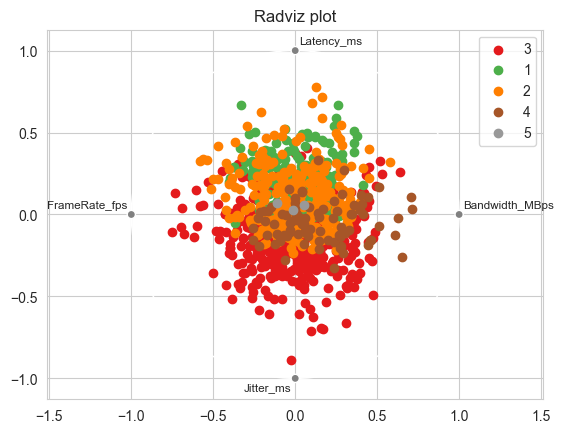

In [38]:
from pandas.plotting import radviz 

cols = ['Bandwidth_MBps', 'Latency_ms', 'FrameRate_fps', 'Jitter_ms', 'QoE_score']
radviz(data[cols], class_column='QoE_score', colormap='Set1')
plt.title('Radviz plot')
plt.show()


## Corrélation des données 

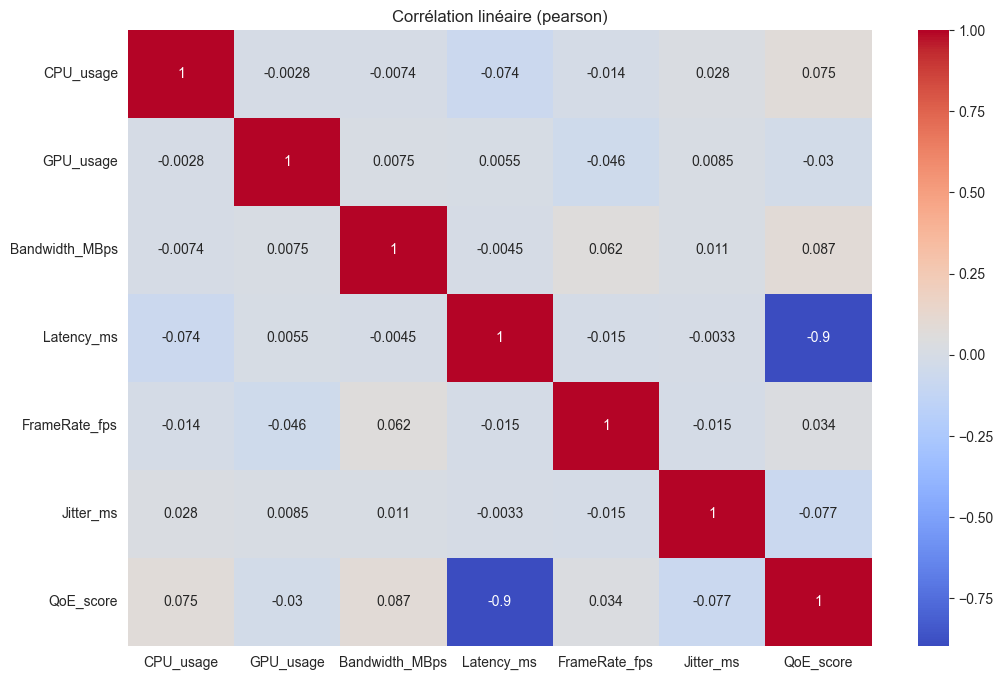

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title('Corrélation linéaire (pearson)')
plt.show()

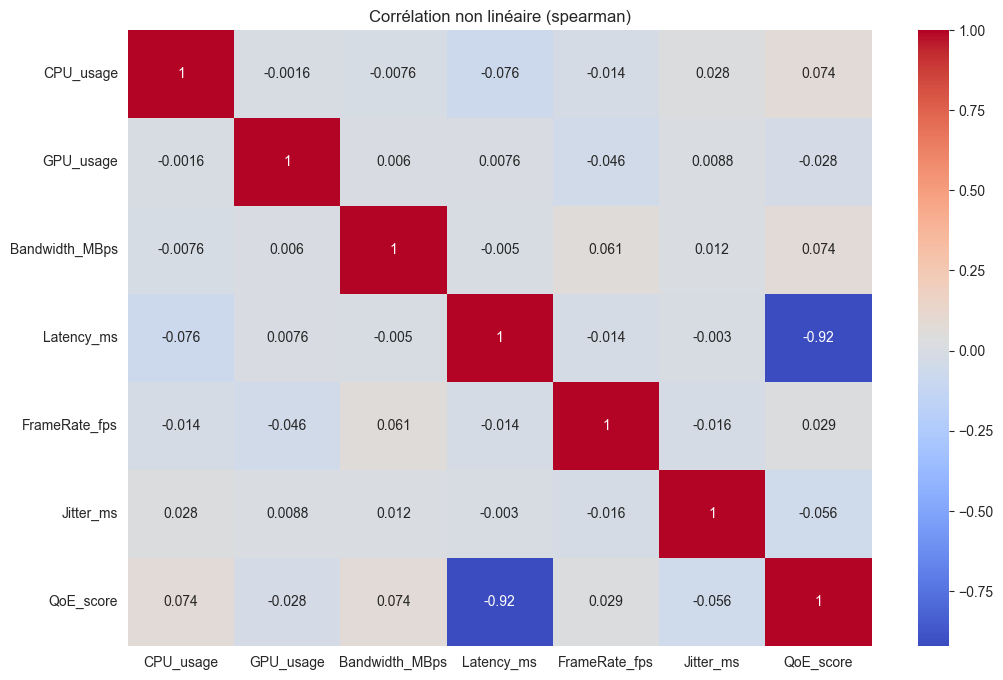

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title('Corrélation non linéaire (spearman)')
plt.show()

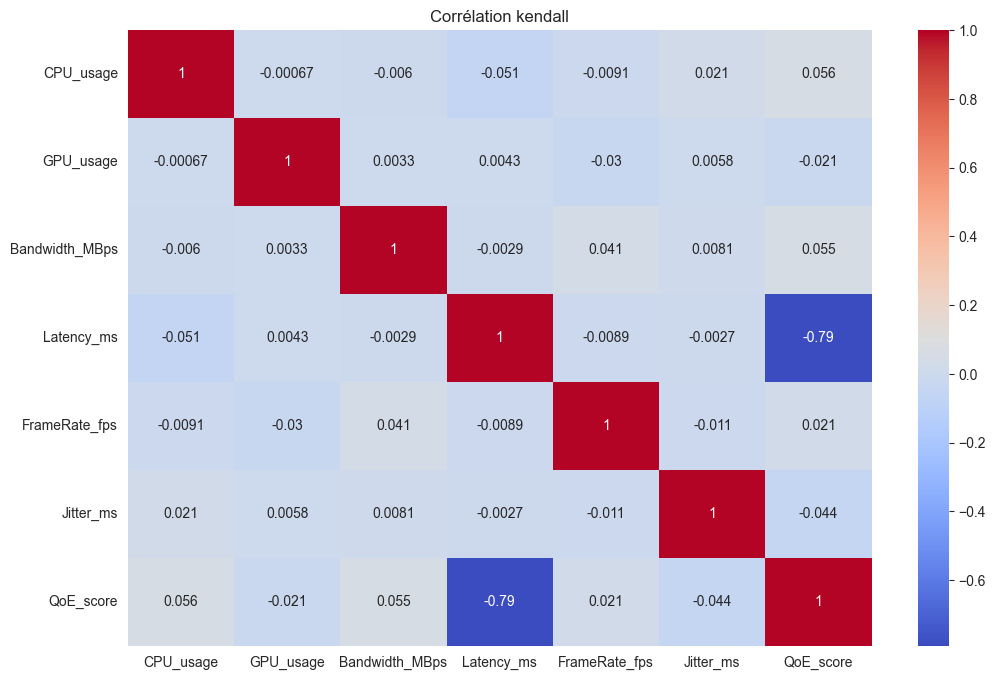

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(method='kendall'), annot=True, cmap='coolwarm')
plt.title('Corrélation kendall')
plt.show()

# Models for classification task 

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE

# Modèles
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

Besoin de supprimer la classe note QoE = 5 car extrêmement minoritaire que le SMOTE ne fonctionne pas 

In [43]:
# 1. Suppression de la classe 5
data_classif = data[data['QoE_score'] != 5].copy()

# 2. Séparation features / cible
X = data_classif.drop('QoE_score', axis=1)
y = data_classif['QoE_score']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Equilibrage des classes : oversampling 

In [46]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [47]:
models = {
    'SVC': SVC(random_state=42),
    'SGDClassifier': SGDClassifier(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'NearestCentroid': NearestCentroid(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'MLPClassifier': MLPClassifier(random_state=42, max_iter=1000)
}

In [48]:
# 7. Entraînement + Évaluation
for name, model in models.items():
    print(f"--- {name} ---")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

--- SVC ---
[[63  4  0  0]
 [ 6 85  3  0]
 [ 0  7 99  8]
 [ 0  0  4 21]]
              precision    recall  f1-score   support

           1       0.91      0.94      0.93        67
           2       0.89      0.90      0.89        94
           3       0.93      0.87      0.90       114
           4       0.72      0.84      0.78        25

    accuracy                           0.89       300
   macro avg       0.86      0.89      0.87       300
weighted avg       0.90      0.89      0.89       300

--- SGDClassifier ---
[[67  0  0  0]
 [ 6 70 18  0]
 [ 0 15 81 18]
 [ 0  0  5 20]]
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        67
           2       0.82      0.74      0.78        94
           3       0.78      0.71      0.74       114
           4       0.53      0.80      0.63        25

    accuracy                           0.79       300
   macro avg       0.76      0.81      0.78       300
weighted avg       0.80      

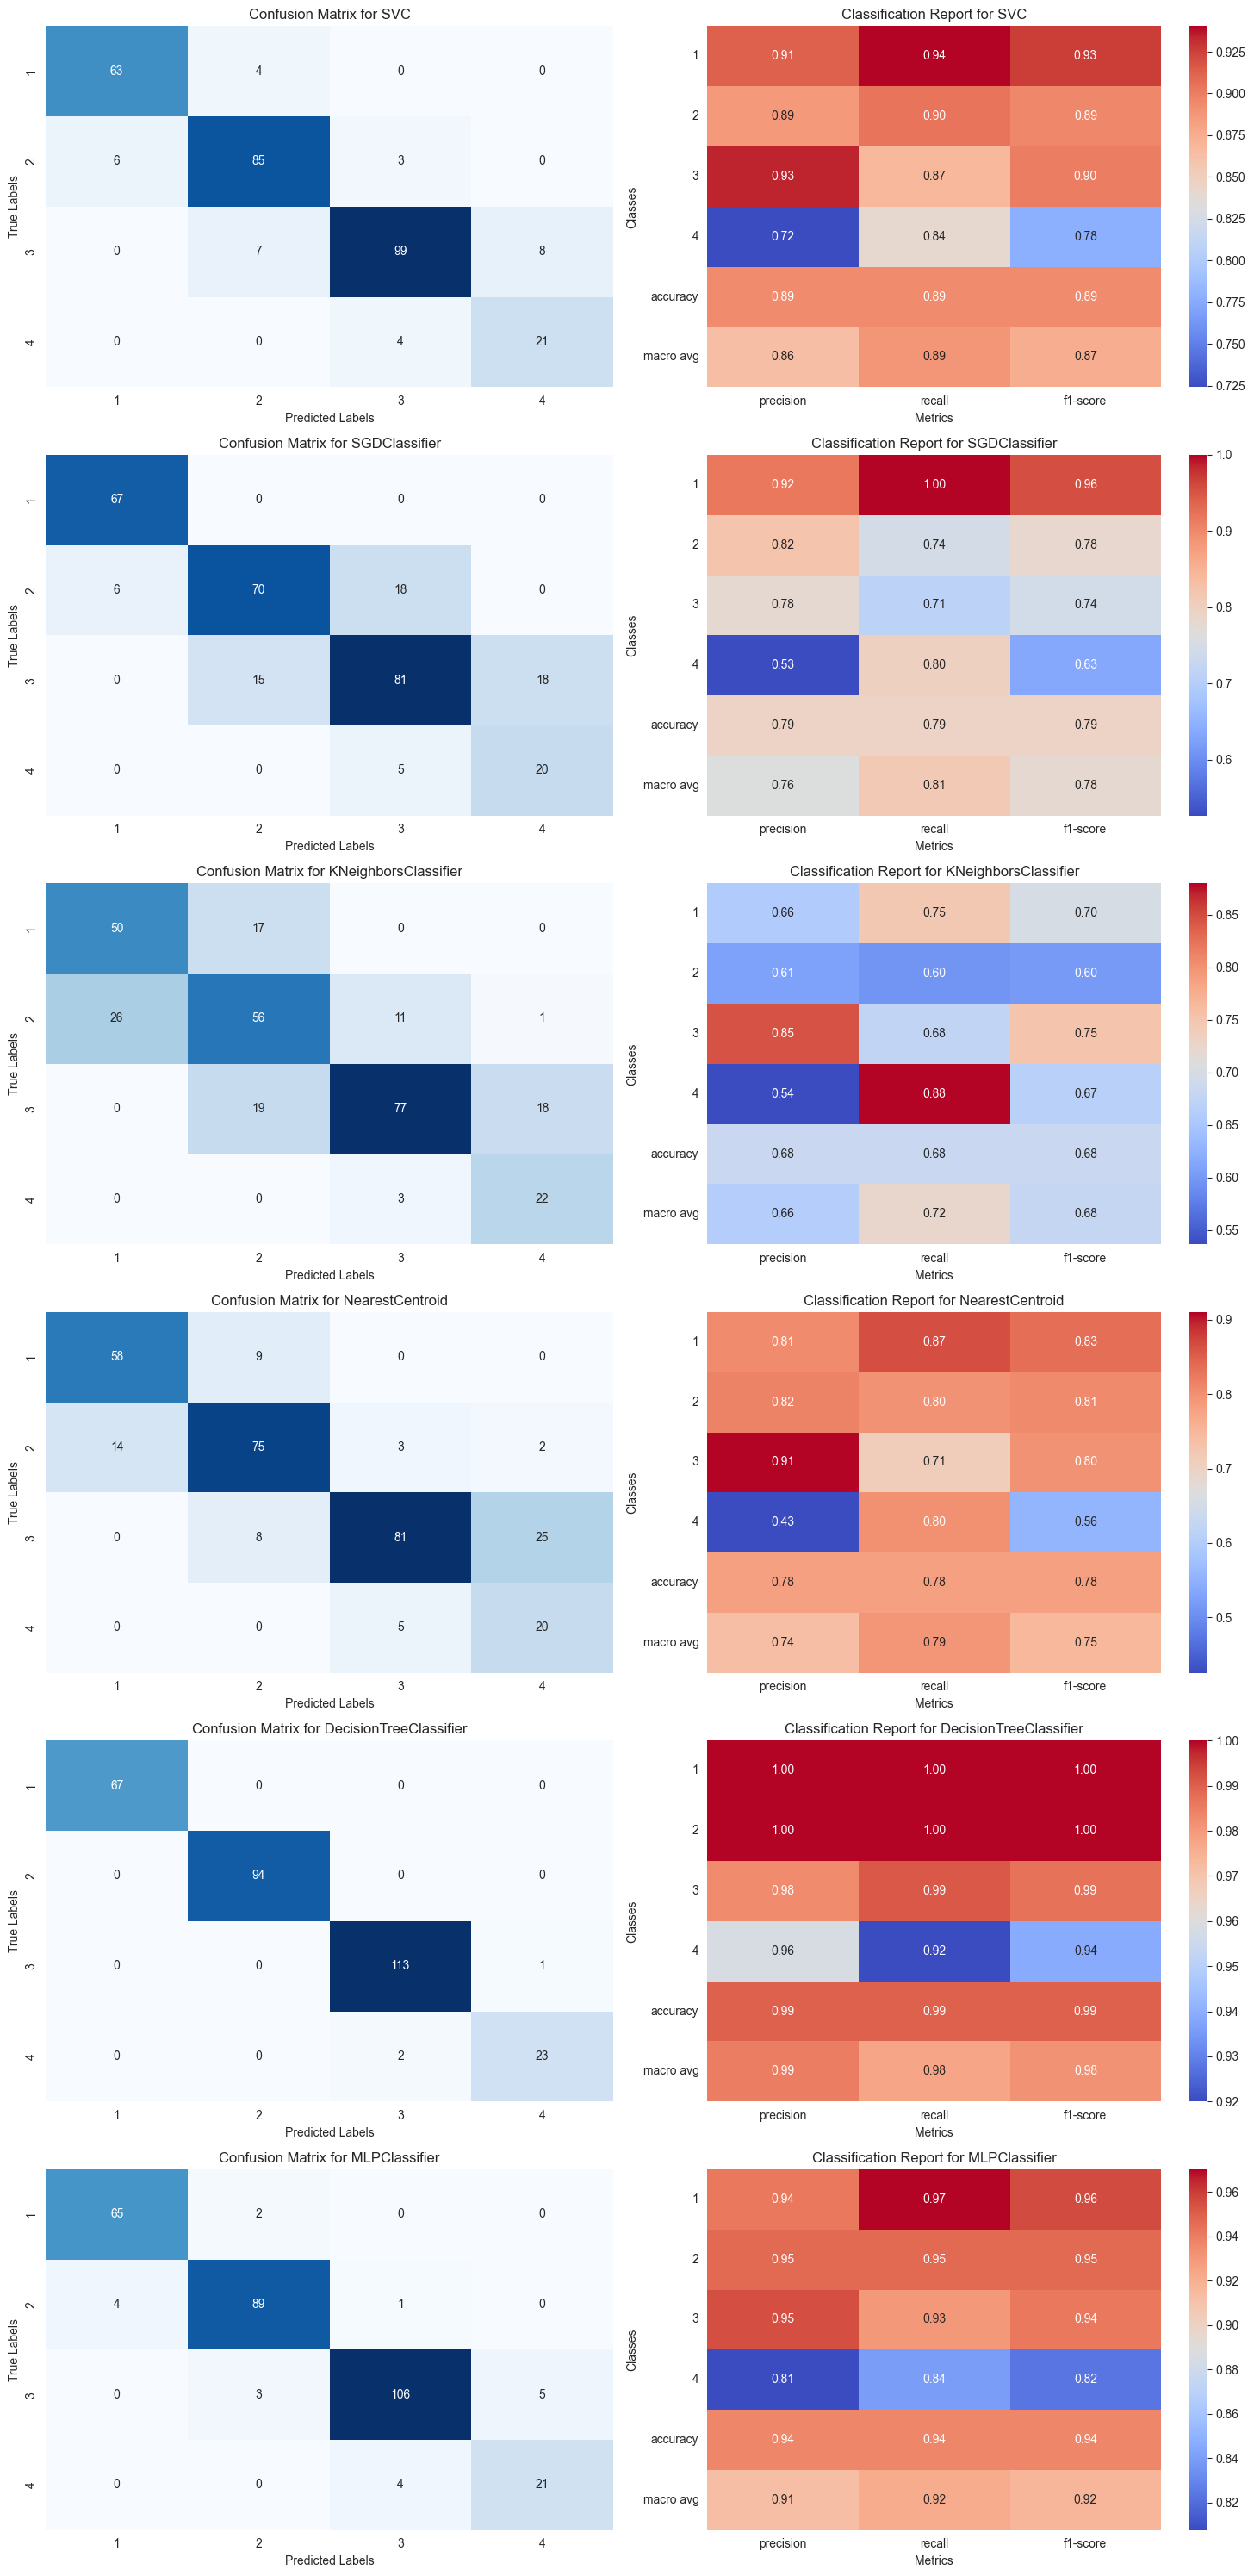

In [50]:
# Classes spécifiques de 1 à 4
class_labels = ['1', '2', '3', '4']

# Préparer un graphique de confusion et un tableau pour chaque modèle
fig, axes = plt.subplots(len(models), 2, figsize=(15, len(models) * 5))

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    
    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred, labels=[1, 2, 3, 4])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i, 0], xticklabels=class_labels, yticklabels=class_labels)
    axes[i, 0].set_title(f'Confusion Matrix for {name}')
    axes[i, 0].set_xlabel('Predicted Labels')
    axes[i, 0].set_ylabel('True Labels')
    
    # Rapport de classification
    report = classification_report(y_test, y_pred, target_names=class_labels, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='coolwarm', cbar=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Classification Report for {name}')
    axes[i, 1].set_xlabel('Metrics')
    axes[i, 1].set_ylabel('Classes')

# Ajuster la mise en page pour éviter les chevauchements
plt.tight_layout()
plt.show()